In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("summary_all.csv")

In [4]:
df["coverage"] = df["infected"]/df["n"]

In [20]:
def drawPlotsH(df, cnt, h, rounds):
    n = df[df["n"] == cnt]
    n = n[n["k"]<16]
    n = n[n["h"]==h]

    plt = n[n["r"]<20][["r", "k", "msgs"]] \
        .groupby(["k", "r"], as_index=True) \
            .mean() \
            .unstack(0) \
        .plot(figsize=(16, 6), title="Number of messages sent at each round (h==1)", grid=True, style=["bs-", "y*-", "g^-", "r.-"])
    plt.set_ylabel("Number of messages sent")
    plt.set_xlabel("Rounds")
    plt.legend(["k=1", "k=2", "k=4", "k=8"], loc=2, ncol=1)

    plt = n[n["r"]<=rounds][["r", "k", "coverage"]] \
        .groupby(["k", "r"], as_index=True) \
            .mean() \
            .unstack(0) \
        .plot(figsize=(16, 6), kind='bar', title="Percentage of infected nodes per round (h==%d)" % h, grid=True)
    # Set plot axis labels and readable legend
    plt.set_xlabel("Rounds")
    plt.set_ylabel("Percentage of Infected")
    plt.legend(["k=1", "k=2", "k=4", "k=8"], loc=2, ncol=1)      

In [21]:
def drawPlotsK(df, cnt, k, rounds):
    n = df[df["n"] == cnt]
    n = n[n["k"]==k]
    n = n[n["h"]<=7]
    
    plt = n[n["r"]<rounds][["r", "h", "coverage"]] \
        .groupby(["h", "r"], as_index=True) \
            .mean() \
            .unstack(0) \
        .plot(kind="bar", figsize=(16, 6), title="Percentage of infected nodes per round (k==%d)" %k, grid=True) 
    # Set plot axis labels and readable legend
    plt.set_xlabel("Rounds")
    plt.set_ylabel("Percentage of Infected")
    plt.legend(["h=1", "h=2", "h=3", "h=4", "h=5", "h=6", "h=7", "h=8", "h=9", "h=10"], loc=2, ncol=2)
    
    plt = n[n["r"]<rounds][["r", "h", "msgs"]] \
        .groupby(["h", "r"], as_index=True) \
            .mean() \
            .unstack(0) \
        .plot(figsize=(16, 6), title="Percentage of infected nodes per round (k==%d)" %k, grid=True) 
    # Set plot axis labels and readable legend
    plt.set_xlabel("Rounds")
    plt.set_ylabel("Number of messages sent")
    plt.legend(["h=1", "h=2", "h=3", "h=4", "h=5", "h=6", "h=7", "h=8", "h=9", "h=10"], loc=2, ncol=2)      

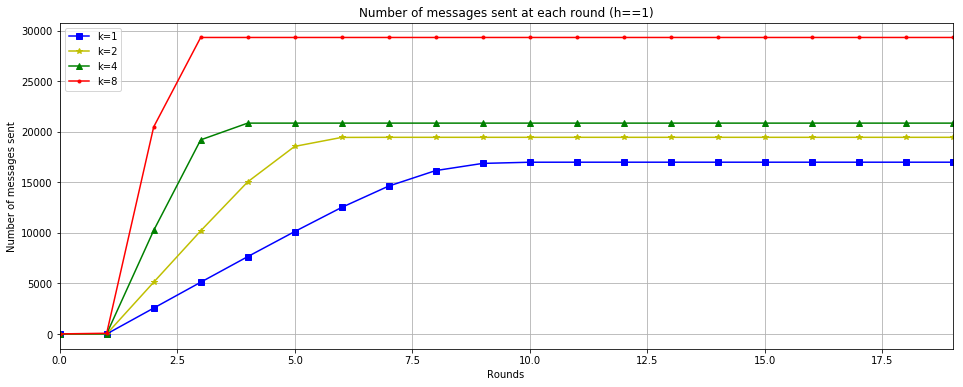

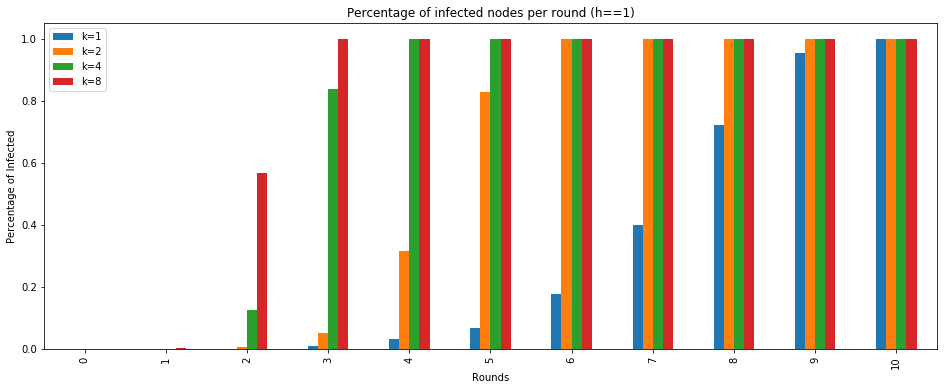

In [8]:
drawPlotsH(df=df, cnt=2560, h=1, rounds=10)

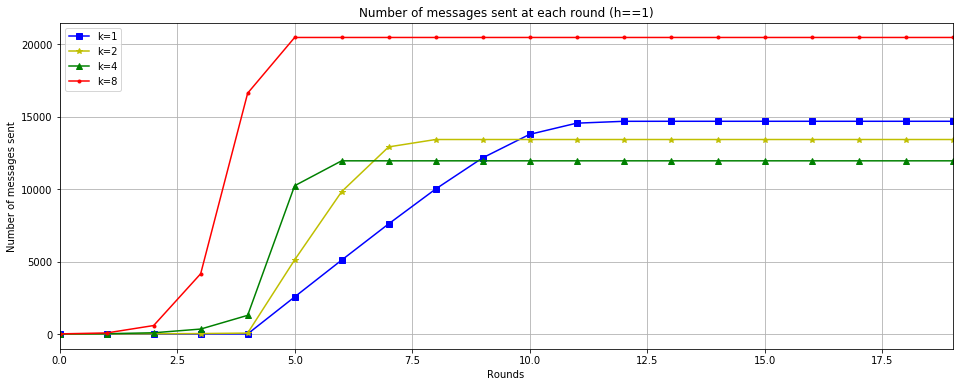

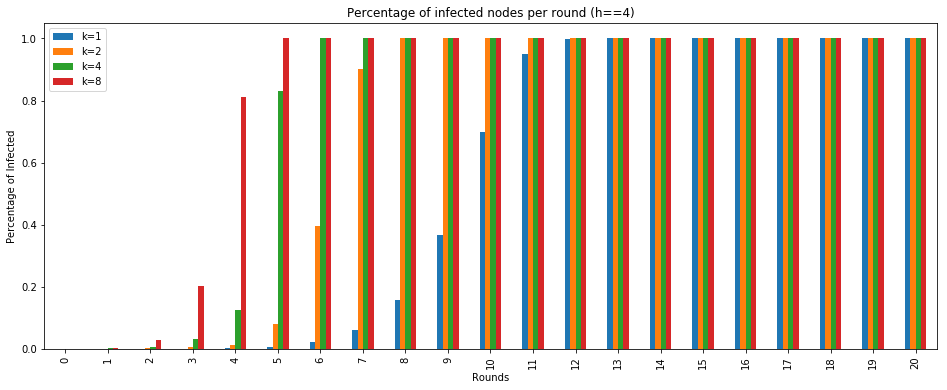

In [11]:
drawPlotsH(df=df, cnt=2560, h=4, rounds=20)

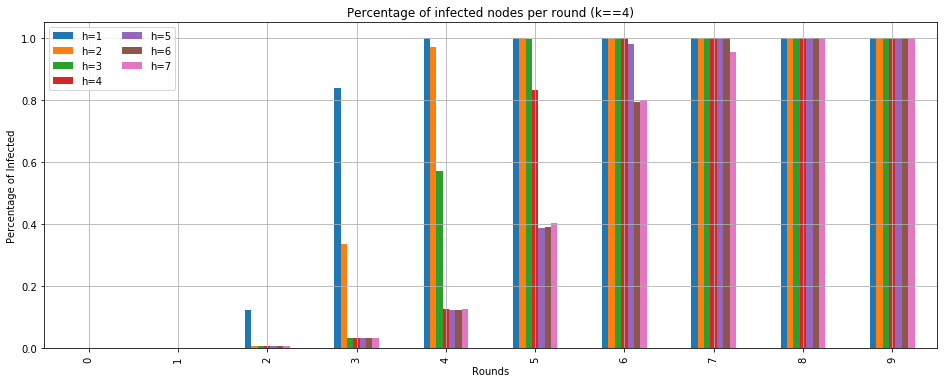

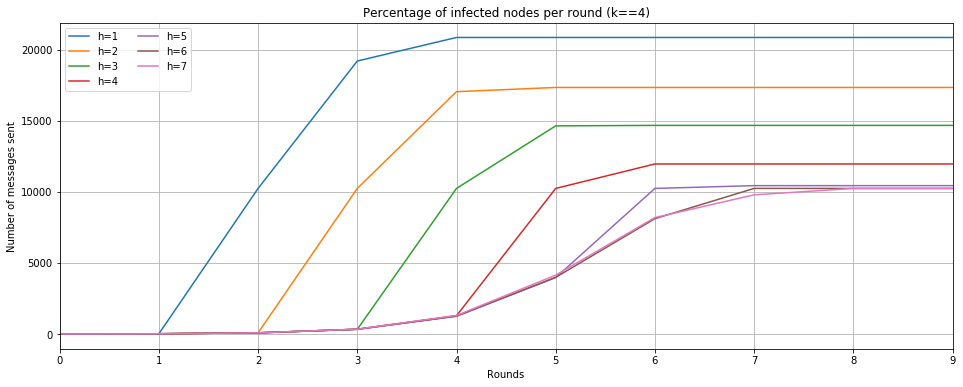

In [23]:
drawPlotsK(df=df, cnt=2560, k=4, rounds=10)